In [1]:
from pyroclastmpm import (
    NoSlipWall,
    SlipWall,
    Gravity,
    NewtonFluid,
    ParticlesContainer,
    NodesContainer,
    USL,
    MUSL,
    CubicShapeFunction,
    set_globals
    
)

import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Define simulation parameters

L = 1.2 #m
H = 1.4
cs = 1./40

rho0 = 1800
K =  0.36*1000
G = 0.01

c = np.sqrt(K/rho0)

ppc = 2

# Define simulation parameters
set_globals(
    dimension=3,
    dt=5e-5,
    shape_function=CubicShapeFunction,
    output_directory="./output",
)


/home/retief/.cache/pypoetry/virtualenvs/pyroclastmpm-P1c3hYaX-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


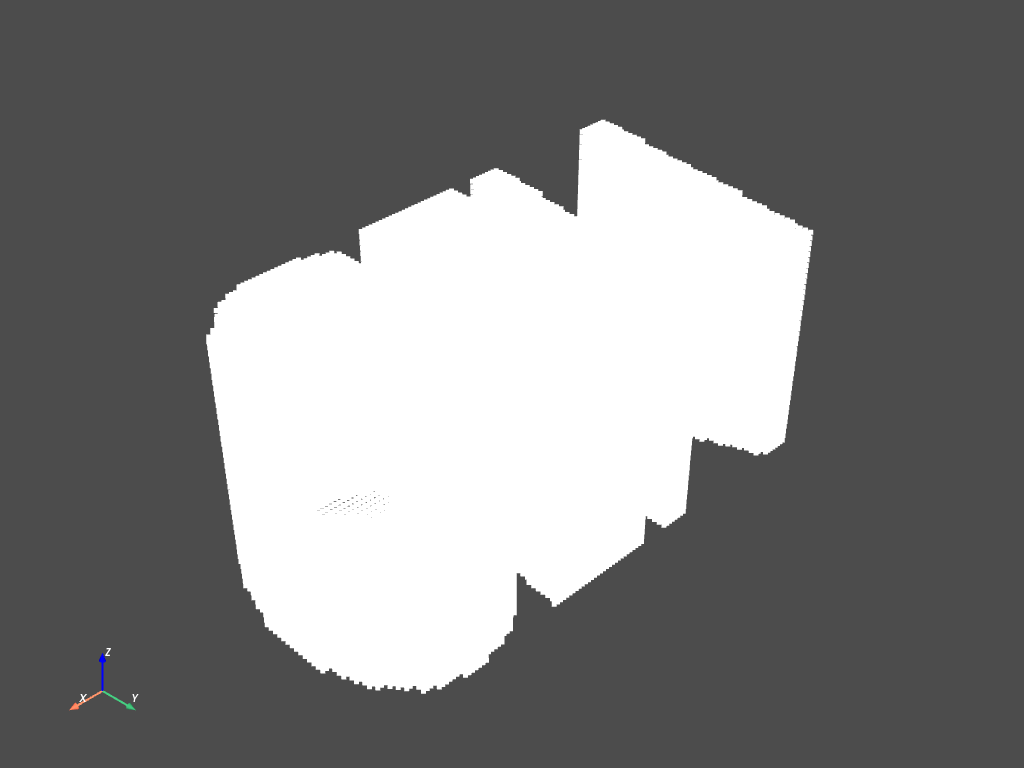

0.203596 1.206091


In [3]:

import pyvista as pv

mesh = pv.read("blender/CEM.obj")
cpos = mesh.plot()
points = np.array(mesh.points)
print(points.min(),points.max())

In [4]:
nodes = NodesContainer(
    node_start=np.array([0.0, 0.0, 0.0]),
    node_end=np.array([L + 4 * cs, H + 4 * cs, L + 4 * cs]),
    node_spacing=cs,
)


# node_coords = nodes.give_coords()


# wspread = np.arange(0, 0.6 + cs,cs/ppc) + 6.5*(cs)
# hspread = np.arange(0, 0.6 + cs, cs/ppc) +  4.5*(cs)
# lspread = np.arange(0, 0.6 + cs, cs/ppc) +  6.5*(cs)
# xv, yv, zv = np.meshgrid(wspread, hspread,lspread)

# particle_coords = np.array(list(zip(xv.flatten(), yv.flatten(),zv.flatten()))).astype(np.float64)
particle_coords = points
print(f"num_p {len(particle_coords)}, num_c {nodes.num_nodes_total} \n")


num_p 136122, num_c 164944 



In [5]:
vels = np.zeros(particle_coords.shape)

mass = np.ones(len(particle_coords))*rho0*cs*cs

volume = np.ones(len(particle_coords))*cs

particles = ParticlesContainer(
    positions=particle_coords,
    masses=mass,
    volumes=volume,
    velocities=vels
)


material = NewtonFluid(viscocity=G,bulk_modulus=K,gamma=7)

particles.materials = [material]

wally0 = NoSlipWall(wallplane="y0")
wally1 = NoSlipWall(wallplane="y1")

wallx0 = SlipWall(wallplane="x0")
wallx1 = SlipWall(wallplane="x1")

wallz0 = SlipWall(wallplane="z0")
wallz1 = SlipWall(wallplane="z1")


wallgrav = Gravity(gravity=np.array([0,-40.81,0]))


MPM = USL(
    particles=particles,
    nodes=nodes,
    total_steps=50000,
    output_steps=500,
    output_start=0,
    boundaryconditions=[wally0,wally1, wallx0, wallx1, wallz0,wallz1,wallgrav],
)

In [6]:

MPM.run()
